# LAB 2 - Sudhan Shrestha [8889436]

## Part A:

In [548]:
# importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

#### Importing the dataset Lab2_dataset.csv

In [549]:
df_lab2 = pd.read_csv('csv/Lab2_dataset.csv')
df_lab2.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


Renaming a column for better readibility

In [550]:
df_lab2.rename({'label_num': 'spam'}, axis=1, inplace=True) # renaming the column label_num as spam
df_lab2.head()

,Unnamed: 0,label,text,spam
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


#### Data Exploratory

In [551]:
df_lab2.shape

(5171, 4)

Grouping by category to see the spam and non spam data

In [552]:
df_lab2.groupby('label').describe()

Unnamed: 0                                                          
           count    mean          std     min      25%     50%      75%   
label                                                                     
ham       3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25  \
spam      1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

                 spam                                     
          max   count mean  std  min  25%  50%  75%  max  
label                                                     
ham    3671.0  3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam   5170.0  1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [553]:
df_lab2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   spam        5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [554]:
# Checking for missing values
df_lab2.isnull().sum()

Unnamed: 0    0
label         0
text          0
spam          0
dtype: int64

In [555]:
#checking for duplicated values
df_lab2.duplicated().sum()

0

#### Visualization of spam vs ham

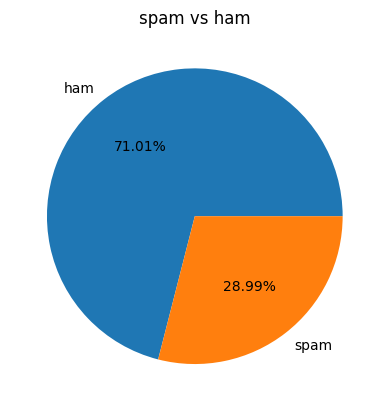

In [556]:
# visualization of data
plt.pie(df_lab2['label'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f%%')
plt.title('spam vs ham')
plt.show()

Splitting the data into X and y values

In [557]:
X = df_lab2.text
y = df_lab2.spam

In [558]:
print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")

Shape of X : (5171,)
Shape of y : (5171,)


#### Train-Test Split

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Count Vectorizer

*Since the text column in this dataset is still in text we convert it into numbers using Count Vectorization technique.*

In [560]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

X_train_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Applying Multinominal Naive Bayes Model

In [561]:
modelMNB = MultinomialNB()
modelMNB.fit(X_train_count.toarray(), y_train)

MultinomialNB()

#### Prediction on a sample data

In [562]:
# Making prediction 

email =['''Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin''',
'''Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .",0
2349,ham,"Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls''']


predict = v.transform(email)
modelMNB.predict(predict.toarray())

array([1, 0], dtype=int64)

*By testing the model by setting the known label which is the first email was spam (1) and second was not spam (2). Hence, the model predicted correctly.*

#### Accuracy

##### Accuracy on test data

In [563]:
# accuracy score of Multinominbal Naives Bayes
scoreMNB = modelMNB.score(v.transform(X_test).toarray(), y_test)
print(f"Accuracy of Multinomial Naives Bayes : {scoreMNB}")

Accuracy of Multinomial Naives Bayes : 0.9719806763285024


#### Prediction on test data

In [564]:
# prediction on test data
X_test_count = v.transform(X_test)
y_predictMNB = modelMNB.predict(X_test_count.toarray())
y_predictMNB

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [565]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_predictMNB: {y_predictMNB.shape}")

Shape of y_test: (1035,)
Shape of y_predictMNB: (1035,)


##### Accuracy on prediction data

In [566]:
acc_scoreMNB = accuracy_score(y_test, y_predictMNB)
print(f"Accuracy of Multinomial Naives Bayes on predicted data : {acc_scoreMNB}")

Accuracy of Multinomial Naives Bayes on predicted data : 0.9719806763285024


*After evaluating the accuracy twice both the times the accuracy seems to be about 97%.*

#### Using Gaussian Naive Bayes Classifier

In [567]:
modelGNB = GaussianNB()
modelGNB.fit(X_train_count.toarray(), y_train)

GaussianNB()

#### Gaussian Model to predict on sample data

In [568]:
modelGNB.predict(predict.toarray())

array([1, 0], dtype=int64)

*The model correct predicted the sample data here as above.*

#### Accuracy

##### Accuracy Score on test data

In [569]:
# accuracy score of Gaussian Naives Bayes
scoreGNB = modelGNB.score(v.transform(X_test).toarray(), y_test)
print(f"Accuracy of Gaussian Naives Bayes : {scoreGNB}")

Accuracy of Gaussian Naives Bayes : 0.9545893719806763


In [570]:
# prediction on test data
y_predictGNB = modelGNB.predict(X_test_count.toarray())
y_predictGNB

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

##### Accuracy Score on prediction data

In [571]:
acc_scoreGNB = accuracy_score(y_test, y_predictGNB)
print(f"Accuracy of Gaussian Naives Bayes on predicted data : {acc_scoreGNB}")

Accuracy of Gaussian Naives Bayes on predicted data : 0.9545893719806763


*After evaluation of accuracy twice here as well the accuracy seems to be about 95%.*

**Best Model:** </br>
**Seeing the accuracy score of both the model the Multinomial Model perfomes slightly better then the Gaussian with the score percentage of around 97% to that of 95%. Hence, the Multinomial Naive Bayes model is the better one here.**

## Part B :

#### Importing the data set

In [572]:
# loading the air bnb dataset
df_airbnb = pd.read_csv('csv/AB_NYC_2019.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Data Exploration

In [573]:
df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [574]:
df_airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [575]:
print("Sum of null values:", df_airbnb.price.isnull().sum())# checking null values
print("Sum of NA values:",df_airbnb.price.isna().sum())# checking na values

Sum of null values: 0
Sum of NA values: 0


#### Box-plot to view outliers in price

Text(0.5, 1.0, 'Box plot for price')

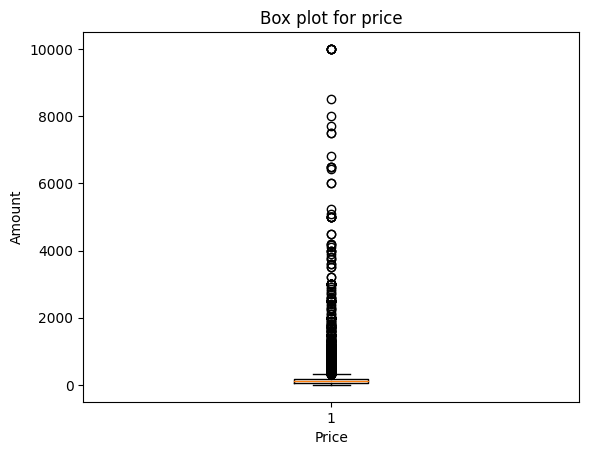

In [576]:
# Box plot to check outliers
plt.boxplot(df_airbnb.price)
plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Box plot for price')

#### Histogram of price

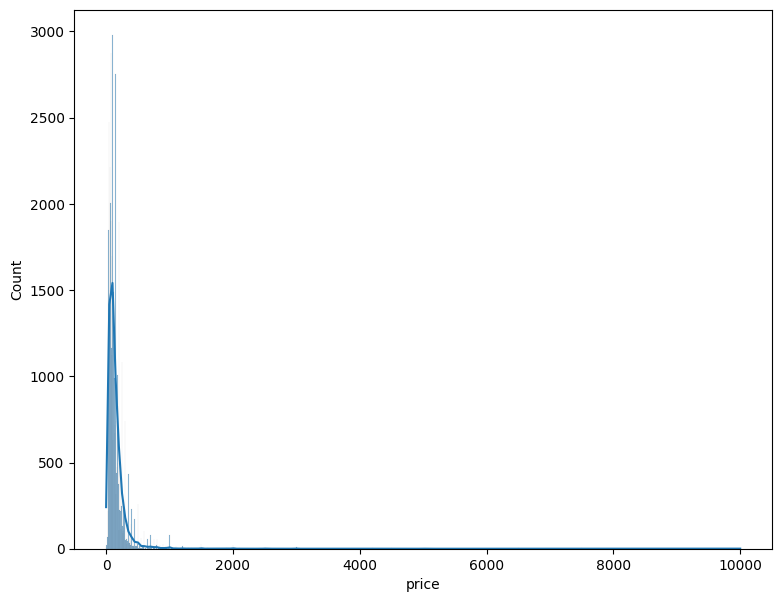

In [577]:
fig = plt.figure(figsize=(9,7))
sns.histplot(df_airbnb.price, kde=True)
plt.show()

### Removing the outliers using various methods

#### Using Mean to remove outlier:

In [578]:
# Calculating mean and standard deviation of price
mean_price = df_airbnb['price'].mean()
std_price = df_airbnb['price'].std()

# setting threshold for outliers
lower_threshold = mean_price - (3 * std_price)
upper_threshold = mean_price + (3 * std_price)

# Removing the outliers
mean_removed_outliers = df_airbnb[(df_airbnb['price'] >= lower_threshold) & (df_airbnb['price'] <= upper_threshold)]

mean_removed_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### Using Median to remove outliers:

In [579]:
# Calculating median
median_price = df_airbnb['price'].median()

# Calculating the Median Absolute Deviation
mad = np.median(np.abs(df_airbnb['price']- median_price))

# setting threshold for outliers
lower_threshold = median_price - (3 * mad)
upper_threshold = median_price + (3 * mad)

# Removing the outliers
median_removed_outliers = df_airbnb[(df_airbnb['price'] >= lower_threshold) & (df_airbnb['price'] <= upper_threshold)]

median_removed_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### Using percentiles to remove outliers:

In [580]:
# lower percentiles 
lower_percentile = df_airbnb['price'].quantile(0.01)
# upper percentile
upper_percentile = df_airbnb['price'].quantile(0.99)

# removing the outliers
percentile_removed_outliers = df_airbnb[(df_airbnb['price'] >= lower_percentile) & (df_airbnb['price'] <= upper_percentile)]

percentile_removed_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### Box-plot after removing the outliers

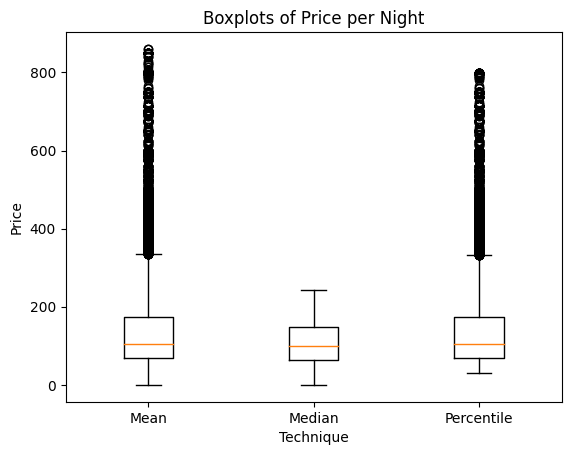

In [581]:
# list containing the cleaned dataframes using various techniques
dataframes = [mean_removed_outliers, median_removed_outliers, percentile_removed_outliers]

# list of labels for the boxplots
labels = ['Mean', 'Median', 'Percentile']



# Plotting the boxplot for each DataFrame
plt.boxplot([df['price'] for df in dataframes], labels=labels)

# Set the title and labels for the plot
plt.title('Boxplots of Price per Night')
plt.xlabel('Technique')
plt.ylabel('Price')

# Display the plot
plt.show()

**Looking at the box plot using different techniques, we can observe that the removal of the outliers using median seems to be the most effective one as it seems to have removed the outliers completely.**

#### Histogram after removing the outliers

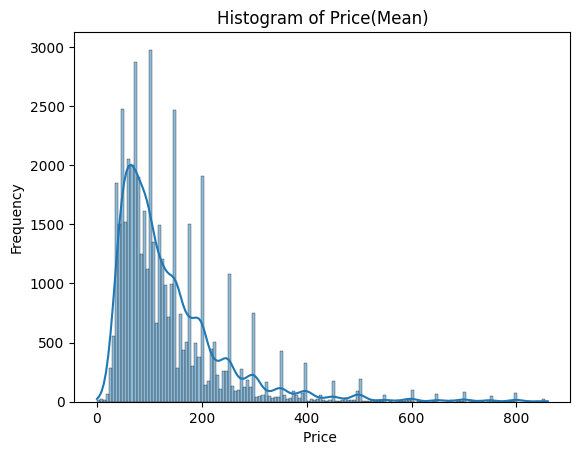

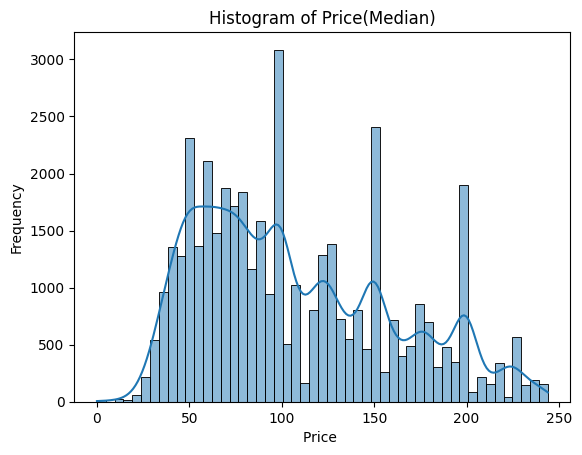

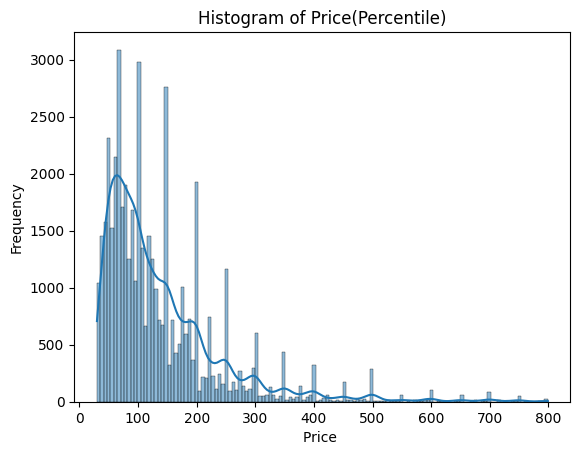

In [582]:
# Plot the histogram for each DataFrame
for i, df in enumerate(dataframes):
    sns.histplot(data=df, x='price', kde=True)
    plt.title(f'Histogram of Price({labels[i]})')
    plt.xlabel('Price ')
    plt.ylabel('Frequency')
    plt.show()

**Similarly, the histogram of the one that used the median to remove the outliers seems to be the one with the most normal distribution out of them.**

#### Summary Stats for each cleaned dataframe in terms of price :

In [583]:
print("MEAN: \n",mean_removed_outliers.price.describe())

MEAN: 
 count    48507.000000
mean       138.746903
std        107.558233
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64


In [584]:
print("MEDIAN: \n",median_removed_outliers.price.describe())

MEDIAN: 
 count    42410.000000
mean       107.046168
std         52.848804
min          0.000000
25%         65.000000
50%         99.000000
75%        149.000000
max        244.000000
Name: price, dtype: float64


In [585]:
print("PERCENTILE: \n",percentile_removed_outliers.price.describe())

PERCENTILE: 
 count    48017.000000
mean       138.502010
std        103.694011
min         30.000000
25%         70.000000
50%        105.000000
75%        175.000000
max        799.000000
Name: price, dtype: float64


**Seeing at the statistics of the data for price in each cleaned dataset as well, the median seems to have the lowest count, meaning it removed the most outlier, where the count of rows is 42410 after removing the outliers.Hence, looking into all the observations we can say that the using median to remove the outlier seems to be the most effective in this dataset.**